In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<AxesSubplot:>

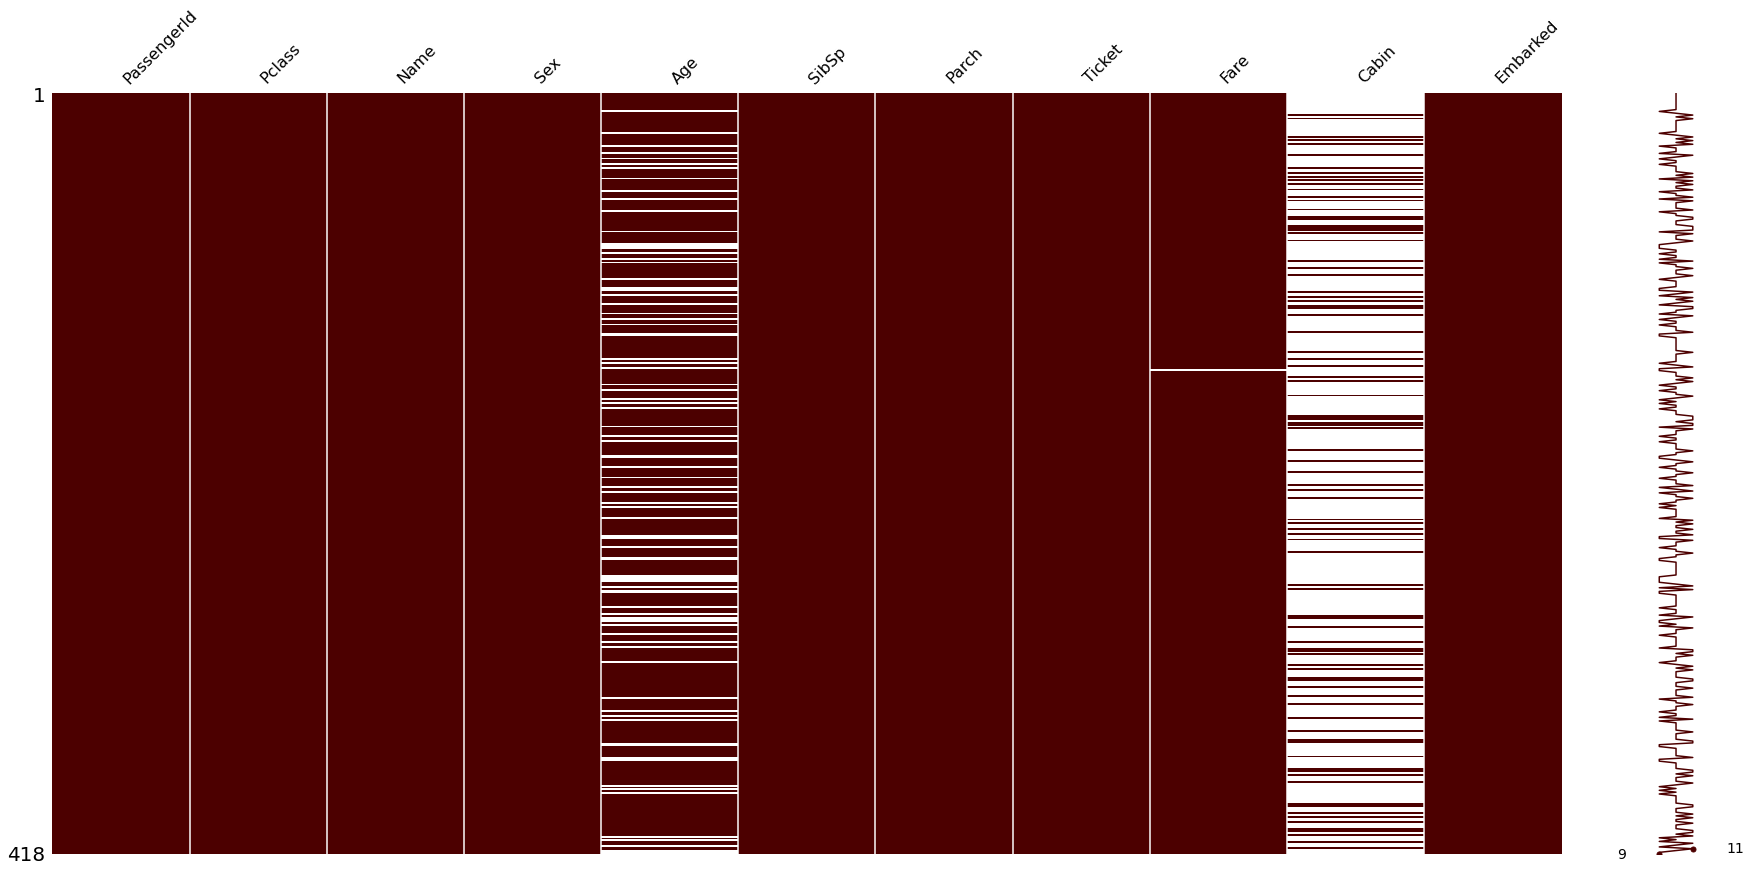

In [5]:
import missingno as msno

msno.matrix(df=test, figsize=(30, 14), color=(0.3, 0, 0))

Removing columns with misleading or unnecessary information

In [6]:
train = train.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
test = test.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [7]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
X = pd.get_dummies(train.drop("PassengerId", axis = 1))
Test = pd.get_dummies(test.drop("PassengerId", axis = 1))

In [9]:
from sklearn.preprocessing import LabelEncoder

for i in range(X.shape[1]):
    #print(X.iloc[:, i])
    if X.iloc[:, i].dtypes == object:
        lenc = LabelEncoder()
        lenc.fit(list(X.iloc[:, i].values)+list(Test.iloc[:, i].values))
        X.iloc[:, i] = lenc.transform(list(X.iloc[:, i].values))
        Test.iloc[:, i] = lenc.transform(list(Test.iloc[:, i].values))

In [10]:
X.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male
0,0,3,1,0,0,1
1,1,1,1,0,1,0
2,1,3,0,0,1,0
3,1,1,1,0,1,0
4,0,3,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X.drop("Survived", axis=1), X['Survived'], test_size = 0.2, random_state = 0)

In [12]:
X_train.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
140,3,0,2,1,0
439,2,0,0,0,1
817,2,1,1,0,1
378,3,0,0,0,1
491,3,0,0,0,1


In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [14]:
print("Accuracy: ",clf.score(X_val, y_val))

Accuracy:  0.7988826815642458


In [15]:
print("Training Accuracy: ", clf.score(X_train, y_train))

Training Accuracy:  0.800561797752809


In [16]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 0)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, model2.predict(X_val))
print("Accuracy Score on Random Forest:", accuracy)

Accuracy Score on Random Forest: 0.7988826815642458


In [18]:
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
print("Accuracy Score on Random Forest:", train_accuracy)

Accuracy Score on Random Forest: 0.8146067415730337


In [19]:
preds = model2.predict(Test)

res = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": preds})
res.to_csv("submission.csv", index=False)
print("Submission saved successfully.")

Submission saved successfully.


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#model_params = {}

model = LogisticRegression()#model_params)
#model2 - RandomForestClassifier()
grid_params = {
    "verbose": [10],
    "C": [.001, .01, .1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]
}
clf = GridSearchCV(model, grid_params)

In [21]:
print(clf)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0, 5000.0,
                               10000.0, 50000.0, 100000.0],
                         'verbose': [10]})


In [22]:
import warnings

warnings.filterwarnings("ignore", "Solver terminated early.*")
clf.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00


X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00


 U =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00


At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94401D+02    |proj g|=  2.33000D+02


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -7.7843D+04  7.7843D+04
Distance to the stationary point =   1.0000D+00
Cauchy X =  
     -2.3300D+02 -5.1500D+01 -8.5000D+00  5.1000D+01 -1.1750D+02 -6.6500D+01

---------------- exit CAUCHY----------------------

           6  variables are free at GCP            1
 LINE SEARCH           1  times; norm of step =   0.14544706513332509     

At iterate    1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

 LINE SEARCH           0  times; norm of step =   0.86271575090362540     

At iterate    3    f=  2.95654D+02    |proj g|=  2.01794D+01

 X = -2.9914D-01 -2.3552D-01  2.0484D-01  1.0874D+00 -7.9926D-01  2.9083D-01


 G =  2.0179D+01  1.8308D+00  9.4240D+00 -3.4342D+00  9.6639D-01 -5.3488D+00



ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.24985408905782747     

At iterate    4    f=  2.92574D+02    |proj g|=  9.24879D+00

 X = -3.9336D-01 -2.1132D-01  1.3225D-01  1.2242D+00 -8.0558D-01  4.6096D-01


 G =  9.2488D+00  2.0408D+00  4.8609D+00  4.4083D-01 -3.0243D+00 -6.7693D+00



ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.42522302195787670     

At iterate    5    f=  2.89886D+02    |proj g|=  6.52055D+00

 X = -5.6392D-01 -1.9558D-01  1.8298D-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 


At iterate    8    f=  2.59603D+02    |proj g|=  1.45062D+00

 X = -8.5833D-01 -3.6796D-01 -5.8681D-02  2.1501D+00 -8.1701D-01  1.3471D+00


 G = -1.4506D+00 -8.2629D-01 -5.9901D-02 -3.8978D-02 -4.5904D-01 -6.3133D-01



ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.3283905710575347E-002

At iterate    9    f=  2.59596D+02    |proj g|=  4.35174D-01

 X = -8.5550D-01 -3.5965D-01 -6.4901D-02  2.1430D+00 -8.1429D-01  1.3454D+00


 G = -4.3517D-01 -2.6527D-01 -1.8723D-01 -1.3638D-02 -7.5098D-02 -2.2161D-01



ITERATION    10

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.7967114844748677E-003

At iterate   10    f=  2.59596D+02    |proj g|=  5.30547D-02

 X = -8.5464D-01 -3.5741D-01 -6.4319D-02  2.1403D+00 -8.1358D-01  1.3448D+00


 G = -2.0153D-02 -3.2168D-02 -5.04

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 

 LINE SEARCH           0  times; norm of step =    1.0248328416601104E-003

At iterate   11    f=  2.57343D+02    |proj g|=  8.82136D-02

 X = -8.8233D-01 -2.8201D-01 -1.9813D-02  2.0677D+00 -7.4573D-01  1.3222D+00


 G =  8.8214D-02 -2.5064D-02  5.5435D-03  1.5163D-03  2.9517D-02  2.9711D-02



ITERATION    12

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.7879631370463502E-004

At iterate   12    f=  2.57343D+02    |proj g|=  2.30470D-02

 X = -8.8265D-01 -2.8126D-01 -2.0122D-02  2.0676D+00 -7.4567D-01  1.3221D+00


 G = -2.3047D-02 -2.7412D-04 -1.5956D-02 -1.6290D-02  4.2969D-03 -1.3315D-02



ITERATION    13

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.5936572954517596E-004

At iterate   13    f=  2.57343D+02    |proj g|=  6.81443D-03

 X = -8.8282D-01 -2.8145D-01 -1.9899D-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 

 LINE SEARCH           0  times; norm of step =    5.5351193262177215E-004

At iterate   11    f=  2.59289D+02    |proj g|=  1.52091D-02

 X = -8.5914D-01 -3.5924D-01 -6.5186D-02  2.1568D+00 -8.0916D-01  1.3476D+00


 G =  1.5209D-02 -9.9906D-03 -6.4520D-03 -3.8201D-03  9.5555D-03  5.6006D-03



ITERATION    12

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.4840098813174662E-004

At iterate   12    f=  2.59289D+02    |proj g|=  3.59791D-03

 X = -8.5918D-01 -3.5913D-01 -6.5113D-02  2.1568D+00 -8.0920D-01  1.3476D+00


 G =  3.4655D-03 -1.7892D-03 -2.0582D-04 -2.6769D-03  3.5979D-03  7.8629D-04



ITERATION    13

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.7767019237399406E-004

At iterate   13    f=  2.59289D+02    |proj g|=  5.48559D-03

 X = -8.5924D-01 -3.5917D-01 -6.5108D-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 

 LINE SEARCH           1  times; norm of step =   0.29318059097479643     

At iterate    1    f=  3.56821D+02    |proj g|=  7.42913D+01

 X = -2.4524D-01 -5.6179D-02 -6.4822D-03  4.9697D-02 -1.2208D-01 -7.2384D-02


 G = -2.6223D+01 -7.3076D+00 -3.3294D+01 -7.4291D+01  4.2329D+01 -3.1963D+01



ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.50155210386931104     

At iterate    2    f=  3.18354D+02    |proj g|=  4.86720D+01

 X = -2.6750D-01 -5.5174D-02  1.4592D-01  4.2777D-01 -3.9305D-01  3.4716D-02


 G = -4.5537D+00  1.0070D+01 -7.1883D+00 -4.8672D+01  2.8603D+01 -2.0069D+01



ITERATION     3

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0626719151839654     

At iterate    3    f=  2.82537D+02    |proj g|=  2.35347D+01

 X = -3.1547D-01 -2.8476D-01  2.2457D-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0, 5000.0,
                               10000.0, 50000.0, 100000.0],
                         'verbose': [10]})

In [23]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1, 'verbose': 10}
LogisticRegression(C=1, verbose=10)


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, clf.predict(X_val))
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7988826815642458


In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy Score on Random Forest:", accuracy)

Accuracy Score on Random Forest: 0.800561797752809
